# 前置说明

## 环境说明

conda版本：https://mirrors.tuna.tsinghua.edu.cn/anaconda/archive/Anaconda3-2021.11-Windows-x86_64.exe


python核心包：
- python-docx == 0.8.11

## 模板说明

目的：学习模板，核对数据

[【国君食品 | 年报点评】贵州茅台：品质突出，价值突显—2021年年报点评](https://mp.weixin.qq.com/s?__biz=MzA3NTM1MTQyMg==&mid=2652905961&idx=1&sn=e81ea78e4dc9dc4138efc9216875392b&chksm=84a555f8b3d2dcee650f9f4887f115004f1f246abe26548db74cf28c1a016da7f1938cba6fb6#rd&cid=2663336533939694)

# 数据获取

## 爬取数据

- 参考B站T7视频，这里获取6年的数据
- 强调爬虫可能失效，请大家根据实际情况修改代码，也欢迎热心网友弹幕更正：“202X-XX-XX 爬虫代码失效，我已将调整代码放至评论区”

In [ ]:
import json
import requests
import pandas as pd

In [ ]:
# 结合网址去查看
zcfz_name2code_dict = {
    '股票代码': 'SECUCODE'
    ,'股票简称': 'SECURITY_NAME_ABBR'
    ,'行业名称': 'INDUSTRY_NAME'
    ,'公告日期': 'REPORT_DATE'
    ,'总资产': 'TOTAL_ASSETS'
    ,'固定资产': 'FIXED_ASSET'
    ,'货币资金': 'MONETARYFUNDS'
    ,'应收账款': 'ACCOUNTS_RECE'
    ,'存货': 'INVENTORY'
    ,'总负债': 'TOTAL_LIABILITIES'
    ,'应付账款': 'ACCOUNTS_PAYABLE'
    ,'预收账款': 'ADVANCE_RECEIVABLES'
    ,'所有者权益': 'TOTAL_EQUITY'
}
zcfz_code2name_dict = {v:k for k,v in zcfz_name2code_dict.items()}

In [ ]:
# 结合网址去查看
lrb_name2code_dict = {
    '股票代码': 'SECUCODE'
    ,'股票简称': 'SECURITY_NAME_ABBR'
    ,'行业名称': 'INDUSTRY_NAME'
    ,'公告日期': 'REPORT_DATE'
    ,'营业收入': 'TOTAL_OPERATE_INCOME'
    ,'营业成本': 'OPERATE_COST'
    ,'销售费用': 'SALE_EXPENSE'
    ,'管理费用': 'MANAGE_EXPENSE'
    ,'财务费用': 'FINANCE_EXPENSE'
    ,'营业总支出': 'TOTAL_OPERATE_COST'
    ,'营业利润': 'OPERATE_PROFIT'
    ,'利润总额': 'TOTAL_PROFIT'
    ,'所得税费用': 'INCOME_TAX'
    ,'净利润': 'OPERATE_INCOME'
}
lrb_code2name_dict = {v:k for k,v in lrb_name2code_dict.items()}

In [ ]:
report_date_list = ['2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31']
pageSize = 500
pageNumber_list = range(20) # 不会超过20了

In [ ]:
def get_zcfz_df_v2(api, code2name_dict):
    res = json.loads(requests.get(api).text)['result']
    if res==None:  # 如果为空就不解析了
        return pd.DataFrame([])
    zcfz_df = pd.DataFrame(res['data'])
    zcfz_df = zcfz_df.loc[:, code2name_dict]
    zcfz_df = zcfz_df.rename(columns=code2name_dict)
    return zcfz_df

In [ ]:
def get_lrb_df_v2(api, code2name_dict):
    res = json.loads(requests.get(api).text)['result']
    if res==None:  # 如果为空就不解析了
        return pd.DataFrame([])        
    lrb_df = pd.DataFrame(res['data'])
    lrb_df = lrb_df.loc[:, code2name_dict]
    lrb_df = lrb_df.rename(columns=code2name_dict)
    return lrb_df

In [ ]:
total_zcfz_df = pd.DataFrame([])
for REPORT_DATE in report_date_list:
    print('开始获取', REPORT_DATE)
    for pageNumber in pageNumber_list:
            zcfz_api = f'https://datacenter-web.eastmoney.com/api/data/v1/get?&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
    f'pageSize={pageSize}&pageNumber={pageNumber}&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")'\
    f'(REPORT_DATE%3D%27{REPORT_DATE}%27)'
            tmp_zcfz_df = get_zcfz_df_v2(zcfz_api, code2name_dict=zcfz_code2name_dict)
            if tmp_zcfz_df.shape[0] == 0:
                break
            else:
                if total_zcfz_df.shape[0] == 0:
                    total_zcfz_df = tmp_zcfz_df
                else:
                    total_zcfz_df = pd.concat([total_zcfz_df, tmp_zcfz_df], axis=0)

In [ ]:
total_zcfz_df.shape

In [ ]:
total_lrb_df = pd.DataFrame([])
for REPORT_DATE in report_date_list:
    print('开始获取', REPORT_DATE)
    for pageNumber in pageNumber_list:
            lrb_api = f'https://datacenter-web.eastmoney.com/api/data/v1/get?sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
f'pageSize={pageSize}&pageNumber={pageNumber}&reportName=RPT_DMSK_FN_INCOME&columns=ALL&filter=(SECURITY_TYPE_CODE+in+(%22058001001%22%2C%22058001008%22))(TRADE_MARKET_CODE!%3D%22069001017%22)'\
f'(REPORT_DATE%3D%27{REPORT_DATE}%27)'
            tmp_lrb_df = get_lrb_df_v2(lrb_api, code2name_dict=lrb_code2name_dict)
            if tmp_lrb_df.shape[0] == 0:
                break
            else:
                if tmp_lrb_df.shape[0] == 0:
                    total_lrb_df = tmp_lrb_df
                else:
                    total_lrb_df = pd.concat([total_lrb_df, tmp_lrb_df], axis=0)

In [ ]:
total_lrb_df.shape

## 优化数据

### 去重拼接

In [ ]:
total_zcfz_dropdu_df = total_zcfz_df.drop_duplicates(subset=['公告日期', '股票代码'])
total_lrb_dropdu_df = total_lrb_df.drop_duplicates(subset=['公告日期', '股票代码'])

In [ ]:
total_zcfz_df_index = total_zcfz_dropdu_df.set_index(['公告日期', '股票代码'])
total_lrb_df_index = total_lrb_dropdu_df.set_index(['公告日期', '股票代码'])

In [ ]:
total_df = pd.concat([total_zcfz_df_index, total_lrb_df_index.iloc[:, 2:]], axis=1)

In [ ]:
total_df.iloc[:2].T

### 修复字段

In [ ]:
total_df['净利润'] = total_df['利润总额'] - total_df['所得税费用']

### 衍生字段

#### 杜邦分析

In [27]:
total_df['同期资产'] = total_df['总资产'].unstack('股票代码').shift(1).stack('股票代码')
total_df['同期权益'] = total_df['所有者权益'].unstack('股票代码').shift(1).stack('股票代码')

In [28]:
total_df['净资产收益率'] = total_df['净利润'] / (total_df['所有者权益'] + total_df['同期权益']) * 2
total_df['利润率'] = total_df['净利润'] / total_df['营业收入']
total_df['资产周转率'] = total_df['营业收入'] / (total_df['总资产'] + total_df['同期资产']) * 2
total_df['权益乘数'] = total_df['总资产'] / total_df['所有者权益']

total_df['资产负债率'] = total_df['总负债'] / total_df['总资产']

#### 毛利率和三费

In [90]:
total_df['毛利率'] = 1 - total_df['营业成本'] / total_df['营业收入']

In [91]:
total_df['销售费用率'] = total_df['销售费用'] / total_df['营业收入']
total_df['管理费用率'] = total_df['管理费用'] / total_df['营业收入']
total_df['财务费用率'] = total_df['财务费用'] / total_df['营业收入']

#### EBIT

In [201]:
total_df['息税前利润'] = total_df['利润总额'] + total_df['财务费用']

## 数据导出

In [284]:
total_df.to_csv('2023-01-08 加工导出.csv')

# 素材准备

## 文字准备

官网参考：https://python-docx.readthedocs.io/en/latest/#contributor-guide

### 官网demo

In [30]:
from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Document Title', 0)

p = document.add_paragraph('A plain paragraph having some ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

document.add_heading('Heading, level 1', level=1)
document.add_paragraph('Intense quote', style='Intense Quote')

document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)
document.add_paragraph(
    'first item in ordered list', style='List Number'
)

# document.add_picture('monty-truth.png', width=Inches(1.25))

records = (
    (3, '101', 'Spam'),
    (7, '422', 'Eggs'),
    (4, '631', 'Spam, spam, eggs, and spam')
)

table = document.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Qty'
hdr_cells[1].text = 'Id'
hdr_cells[2].text = 'Desc'
for qty, id, desc in records:
    row_cells = table.add_row().cells
    row_cells[0].text = str(qty)
    row_cells[1].text = id
    row_cells[2].text = desc

document.add_page_break()

document.save('demo.docx')

### 获取指定股票数据

#### 股票索引

In [70]:
# 设定参数
stock_id, report_year = '600519.SH', '2021'

In [92]:
stock_df = total_df.swaplevel().loc[stock_id].sort_index()

In [93]:
stock_df

,股票简称,行业名称,总资产,固定资产,货币资金,应收账款,存货,总负债,应付账款,预收账款,...,同期权益,净资产收益率,利润率,资产周转率,权益乘数,资产负债率,毛利率,销售费用率,管理费用率,财务费用率
公告日期,,,,,,,,,,,,,,,,,,,,,
2016-12-31 00:00:00,贵州茅台,酿酒行业,1.129345e+11,1.445318e+10,6.685496e+10,NaN,2.062225e+10,3.703600e+10,1.040608e+09,1.754108e+10,...,NaN,NaN,0.446535,NaN,1.487967,0.327942,0.915077,0.041864,0.104275,-0.000826
2017-12-31 00:00:00,贵州茅台,酿酒行业,1.346101e+11,1.524410e+10,8.786887e+10,NaN,2.205748e+10,3.859049e+10,9.920559e+08,1.442911e+10,...,7.589854e+10,0.337445,0.475026,0.493347,1.401902,0.286683,0.902716,0.048902,0.076999,-0.000913
2018-12-31 00:00:00,贵州茅台,酿酒行业,1.598467e+11,1.524856e+10,1.120748e+11,NaN,2.350695e+10,4.243819e+10,1.178296e+09,1.357652e+10,...,9.601963e+10,0.354495,0.490025,0.524351,1.361458,0.265493,0.915506,0.033317,0.068989,-0.000046
2019-12-31 00:00:00,贵州茅台,酿酒行业,1.830424e+11,1.514418e+10,1.325182e+10,NaN,2.528492e+10,4.116599e+10,1.513677e+09,1.374033e+10,...,1.174085e+11,0.339164,0.494855,0.518269,1.290154,0.224899,0.916380,0.036903,0.069417,0.000084
2020-12-31 00:00:00,贵州茅台,酿酒行业,2.133958e+11,1.622508e+10,3.609109e+10,NaN,2.886909e+10,4.567513e+10,1.342268e+09,NaN,...,1.418764e+11,0.319921,0.505375,0.494368,1.272329,0.214039,0.916790,0.025999,0.069289,-0.002394
2021-12-31 00:00:00,贵州茅台,酿酒行业,2.551682e+11,1.747217e+10,5.181024e+10,NaN,3.339437e+10,5.821069e+10,2.009832e+09,NaN,...,1.677207e+11,0.305587,0.509029,0.467233,1.295549,0.228127,0.917933,0.025007,0.077197,-0.008537


#### 股票元素

获取股票名称

In [73]:
stock_df['股票简称'][0]

'贵州茅台'

In [74]:
stock_data_row = stock_df.shape[0]
if stock_data_row > 0:
    stock_name = stock_df['股票简称'][0]
else:  # raise是主动抛出异常
    raise Exception('不存在该股票的数据')

获取时间索引

In [75]:
report_date = f'{report_year}-12-31 00:00:00'

In [76]:
report_date

'2021-12-31 00:00:00'

In [77]:
stock_df = stock_df.loc[:report_date, :]

In [52]:
stock_df.index

Index(['2016-12-31 00:00:00', '2017-12-31 00:00:00', '2018-12-31 00:00:00',
       '2019-12-31 00:00:00', '2020-12-31 00:00:00', '2021-12-31 00:00:00'],
      dtype='object', name='公告日期')

In [53]:
# 一定要选到元素看看，防止是其他类型
stock_df.index[0]

'2016-12-31 00:00:00'

In [54]:
stock_df.columns

Index(['股票简称', '行业名称', '总资产', '固定资产', '货币资金', '应收账款', '存货', '总负债', '应付账款',
       '预收账款', '所有者权益', '营业收入', '营业成本', '销售费用', '管理费用', '财务费用', '营业总支出',
       '营业利润', '利润总额', '所得税费用', '净利润', '同期资产', '同期权益', '净资产收益率', '利润率',
       '资产周转率', '权益乘数', '资产负债率'],
      dtype='object')

In [55]:
# 这样就可以随便获取数据了
stock_df.loc[report_date, '总资产']

255168195159.9

获取股票行业

In [56]:
stock_industry = stock_df['行业名称'][0]
stock_industry

'酿酒行业'

### 文字规划

- 1 公司收益很不错：营业收入、净利润（当前、同比）
- 2 公司降本提效了：净利率、毛利率提升，三费下降（当前、同比）
- 3 公司财务状况好：净资产收益率提升，净利率、资产周转率、权益乘数状况良好
- 4 公司在行业表现好：从一些好的指标中循环，找到排名前3的指标，有就输出结果（报告都出来后才能分析）

其他数据对比渠道：https://emweb.securities.eastmoney.com/PC_HSF10/FinanceAnalysis/Index?type=web&code=SH600519#dbfx-0

#### P1-公司收益很不错

归母净利润=净利润-少数股东收益  
这里原始数据没有，就先用净利润替代

##### 计算指标

In [78]:
stock_df['营业收入']

公告日期
2016-12-31 00:00:00    4.015508e+10
2017-12-31 00:00:00    6.106276e+10
2018-12-31 00:00:00    7.719938e+10
2019-12-31 00:00:00    8.885434e+10
2020-12-31 00:00:00    9.799324e+10
2021-12-31 00:00:00    1.094643e+11
Name: 营业收入, dtype: float64

In [79]:
revenue = stock_df['营业收入'][-1]
last_revenue = stock_df['营业收入'][-2]
net_income = stock_df['净利润'][-1]
last_income = stock_df['净利润'][-2]

In [80]:
revenue_rate = revenue / last_revenue - 1
net_income_rate = net_income / last_income - 1

##### 拼接文字

In [81]:
revenue_flag = '增长' if revenue_rate > 0 else '下降'
net_income_flag = '增长' if net_income_rate > 0 else '下降'

In [84]:
p1_text_1 = f'{stock_name}({stock_id})全年实现营业总收入{"%.2f" % (revenue/1e8)}亿元，同比{revenue_flag}{"%.2f" % (revenue_rate*100)}%；'

In [85]:
p1_text_1

'贵州茅台(600519.SH)全年实现营业总收入1094.64亿元，同比增长11.71%；'

In [86]:
p1_text_2 = f'实现净利润{"%.2f" %(net_income/1e8)}亿元，同比{net_income_flag}{"%.2f" % (net_income_rate*100)}%。'

In [87]:
p1_text_2

'实现净利润557.21亿元，同比增长12.51%。'

In [88]:
p1_text = p1_text_1 + p1_text_2

In [89]:
p1_text

'贵州茅台(600519.SH)全年实现营业总收入1094.64亿元，同比增长11.71%；实现净利润557.21亿元，同比增长12.51%。'

#### P2-公司降本提效了

##### 计算指标

In [94]:
net_rate = stock_df['利润率'][-1]
last_net_rate = stock_df['利润率'][-2]
net_rate_inc = net_rate - last_net_rate

gross_rate = stock_df['毛利率'][-1]
last_gross_rate = stock_df['毛利率'][-2]
gross_rate_inc = gross_rate - last_gross_rate

sale_rate = stock_df['销售费用率'][-1]
last_sale_rate = stock_df['销售费用率'][-2]
sale_rate_inc = sale_rate - last_sale_rate

admin_rate = stock_df['管理费用率'][-1]
last_admin_rate = stock_df['管理费用率'][-2]
admin_rate_inc = admin_rate - last_admin_rate

finance_rate = stock_df['财务费用率'][-1]
last_finance_rate = stock_df['财务费用率'][-2]
finance_rate_inc = finance_rate - last_finance_rate

##### 拼接文字

In [100]:
net_rate_flag = '增长+' if net_rate_inc > 0 else '下降'
gross_rate_flag = '增长+' if gross_rate_inc > 0 else '下降'
sale_rate_flag = '增长+' if sale_rate_inc > 0 else '下降'
admin_rate_flag = '增长+' if admin_rate_inc > 0 else '下降'
finance_rate_flag = '增长+' if finance_rate_inc > 0 else '下降'

In [101]:
p2_text_1 = f'净利率同期{net_rate_flag}{"%.2f" % (net_rate_inc*100)}pct至{"%.2f" % (net_rate*100)}%，'
p2_text_2 = f'毛利率同期{gross_rate_flag}{"%.2f" % (gross_rate_inc*100)}pct至{"%.2f" % (gross_rate*100)}%。'

In [102]:
p2_text_3 = f'费用率方面，销售费用率同期{sale_rate_flag}{"%.2f" % (sale_rate_inc*100)}pct至{"%.2f" % (sale_rate*100)}%，'
p2_text_4 = f'管理费用率同期{admin_rate_flag}{"%.2f" % (admin_rate_inc*100)}pct至{"%.2f" % (admin_rate*100)}%，'
p2_text_5 = f'财务费用率同期{finance_rate_flag}{"%.2f" % (finance_rate_inc*100)}pct至{"%.2f" % (finance_rate*100)}%。'

In [103]:
p2_text = p2_text_1 + p2_text_2 + p2_text_3 + p2_text_4 + p2_text_5

In [104]:
p2_text

'净利率同期增长+0.37pct至50.90%，毛利率同期增长+0.11pct至91.79%。费用率方面，销售费用率同期下降-0.10pct至2.50%，管理费用率同期增长+0.79pct至7.72%，财务费用率同期下降-0.61pct至-0.85%。'

#### P3-公司财务状况好

##### 计算指标

In [105]:
roe = stock_df['净资产收益率'][-1]
last_roe = stock_df['净资产收益率'][-2]
roe_inc = roe - last_roe

net_rate = stock_df['利润率'][-1]
last_net_rate = stock_df['利润率'][-2]
net_rate_inc = net_rate - last_net_rate

asset_turnover_rate = stock_df['资产周转率'][-1]
last_asset_turnover_rate = stock_df['资产周转率'][-2]
asset_turnover_rate_inc = asset_turnover_rate - last_asset_turnover_rate

debt_asset_rate = stock_df['资产负债率'][-1]
last_debt_asset_rate = stock_df['资产负债率'][-2]
debt_asset_rate_inc = debt_asset_rate - last_debt_asset_rate

##### 拼接文字

In [106]:
roe_flag = '增长+' if roe_inc > 0 else '下降'
net_rate_flag = '增长+' if net_rate_inc > 0 else '下降'
asset_turnover_rate_flag = '增长+' if asset_turnover_rate_inc > 0 else '下降'
debt_asset_rate_flag = '增长+' if debt_asset_rate_inc > 0 else '下降'

In [107]:
p3_text_1 = f'ROE同期{roe_flag}{"%.2f" % (roe_inc*100)}pct至{"%.2f" % (roe*100)}%，根据杜邦分析法拆解，'
p3_text_2 = f'净利率同期{net_rate_flag}{"%.2f" % (net_rate_inc*100)}pct至{"%.2f" % (net_rate*100)}%。'
p3_text_3 = f'资产周转率同期{sale_rate_flag}{"%.2f" % (asset_turnover_rate_inc*100)}pct至{"%.2f" % (asset_turnover_rate*100)}%，'
p3_text_4 = f'资产负债率同期{debt_asset_rate_flag}{"%.2f" % (debt_asset_rate_inc*100)}pct至{"%.2f" % (debt_asset_rate*100)}%。'

In [108]:
p3_text = p3_text_1 + p3_text_2 + p3_text_3 + p3_text_4

In [109]:
p3_text

'ROE同期下降-1.43pct至30.56%，根据杜邦分析法拆解，净利率同期增长+0.37pct至50.90%。资产周转率同期下降-2.71pct至46.72%，资产负债率同期增长+1.41pct至22.81%。'

#### P4-公司在行业表现好

先选出一些指标

In [110]:
# 设定重要性指标排序
rank_index_list = ['净资产收益率', '利润率', '资产周转率', '资产负债率']
# 1表示越大越好， 0表示越小越好
index_direction_list = [1, 1, 1, 0]
# 设定排名前几输出
rank_threshold = 3

In [111]:
report_year_df = total_df.loc[report_date]

In [114]:
industry_df = report_year_df[report_year_df['行业名称']==stock_industry]

In [115]:
industry_df.shape

(38, 32)

In [117]:
for index_name, direction in zip(rank_index_list, index_direction_list):
    print(index_name, direction)

净资产收益率 1
利润率 1
资产周转率 1
资产负债率 0


In [118]:
tmp_ascending = False if direction else True
tmp_df = industry_df.sort_values(by=index_name, ascending=tmp_ascending)

In [121]:
tmp_df['股票简称'].tolist().index(stock_name)

10

In [122]:
# 先赋值，再更新
p4_text = ''
# TODO:拉链方法介绍
for index_name, direction in zip(rank_index_list, index_direction_list):
    # 注意这里方向是反过来的
    tmp_ascending = False if direction else True
    tmp_df = industry_df.sort_values(by=index_name, ascending=tmp_ascending)
    tmp_rank = tmp_df['股票简称'].tolist().index(stock_name)
    if tmp_rank + 1 <= rank_threshold:
        tmp_value = tmp_df.loc[stock_id, index_name]
        tmp_avg_value = tmp_df[index_name].mean()
        direction_flag = '远超过' if direction else '远低于'
        p4_text = f'公司的{index_name}表现良好，达到{"%.2f" % (tmp_value*100)}%，在行业内排名第{tmp_rank+1}，{direction_flag}行业平均的{"%.2f" % (tmp_avg_value*100)}%。'
        break

In [123]:
p4_text

'公司的利润率表现良好，达到50.90%，在行业内排名第1，远超过行业平均的10.16%。'

### 函数封装

#### 解耦封装

In [124]:
def stock_revenue_status(stock_name, stock_id, stock_df):
    revenue = stock_df['营业收入'][-1]
    last_revenue = stock_df['营业收入'][-2]
    net_income = stock_df['净利润'][-1]
    last_income = stock_df['净利润'][-2]
    revenue_rate = revenue / last_revenue - 1
    net_income_rate = net_income / last_income - 1
    revenue_flag = '增长' if revenue_rate > 0 else '下降'
    net_income_flag = '增长' if net_income_rate > 0 else '下降'
    p1_text_1 = f'{stock_name}({stock_id})全年实现营业总收入{"%.2f" %(revenue/1e8)}亿元，同比{revenue_flag}{"%.2f" % (revenue_rate*100)}%；'
    p1_text_2 = f'实现净利润{"%.2f" %(net_income/1e8)}亿元，同比{net_income_flag}{"%.2f" % (net_income_rate*100)}%。'
    p1_text = p1_text_1 + p1_text_2
    return p1_text

In [125]:
def stock_efficiency_status(stock_name, stock_id, stock_df):
    net_rate = stock_df['利润率'][-1]
    last_net_rate = stock_df['利润率'][-2]
    net_rate_inc = net_rate - last_net_rate

    gross_rate = stock_df['毛利率'][-1]
    last_gross_rate = stock_df['毛利率'][-2]
    gross_rate_inc = gross_rate - last_gross_rate

    sale_rate = stock_df['销售费用率'][-1]
    last_sale_rate = stock_df['销售费用率'][-2]
    sale_rate_inc = sale_rate - last_sale_rate

    admin_rate = stock_df['管理费用率'][-1]
    last_admin_rate = stock_df['管理费用率'][-2]
    admin_rate_inc = admin_rate - last_admin_rate

    finance_rate = stock_df['财务费用率'][-1]
    last_finance_rate = stock_df['财务费用率'][-2]
    finance_rate_inc = finance_rate - last_finance_rate

    net_rate_flag = '增长' if net_rate_inc > 0 else '下降'
    gross_rate_flag = '增长' if gross_rate_inc > 0 else '下降'
    sale_rate_flag = '增长' if sale_rate_inc > 0 else '下降'
    admin_rate_flag = '增长' if admin_rate_inc > 0 else '下降'
    finance_rate_flag = '增长' if finance_rate_inc > 0 else '下降'

    p2_text_1 = f'净利率同期{net_rate_flag}{"%.2f" % (net_rate_inc*100)}pct至{"%.2f" % (net_rate*100)}%，'
    p2_text_2 = f'毛利率同期{gross_rate_flag}{"%.2f" % (gross_rate_inc*100)}pct至{"%.2f" % (gross_rate*100)}%。'
    p2_text_3 = f'费用率方面，销售费用率同期{sale_rate_flag}{"%.2f" % (sale_rate_inc*100)}pct至{"%.2f" % (sale_rate*100)}%，'
    p2_text_4 = f'管理费用率同期{admin_rate_flag}{"%.2f" % (admin_rate_inc*100)}pct至{"%.2f" % (admin_rate*100)}%，'
    p2_text_5 = f'财务费用率同期{finance_rate_flag}{"%.2f" % (finance_rate_inc*100)}pct至{"%.2f" % (finance_rate*100)}%。'
    p2_text = p2_text_1 + p2_text_2 + p2_text_3 + p2_text_4 + p2_text_5
    return p2_text

In [126]:
def stock_finance_status(stock_name, stock_id, stock_df):
    roe = stock_df['净资产收益率'][-1]
    last_roe = stock_df['净资产收益率'][-2]
    roe_inc = roe - last_roe

    net_rate = stock_df['利润率'][-1]
    last_net_rate = stock_df['利润率'][-2]
    net_rate_inc = net_rate - last_net_rate

    asset_turnover_rate = stock_df['资产周转率'][-1]
    last_asset_turnover_rate = stock_df['资产周转率'][-2]
    asset_turnover_rate_inc = asset_turnover_rate - last_asset_turnover_rate

    debt_asset_rate = stock_df['资产负债率'][-1]
    last_debt_asset_rate = stock_df['资产负债率'][-2]
    debt_asset_rate_inc = debt_asset_rate - last_debt_asset_rate

    roe_flag = '增长' if roe_inc > 0 else '下降'
    net_rate_flag = '增长' if net_rate_inc > 0 else '下降'
    asset_turnover_rate_flag = '增长' if asset_turnover_rate_inc > 0 else '下降'
    debt_asset_rate_flag = '增长' if debt_asset_rate_inc > 0 else '下降'

    p3_text_1 = f'ROE同期{roe_flag}{"%.2f" % (roe_inc*100)}pct至{"%.2f" % (roe*100)}%，根据杜邦分析法拆解，'
    p3_text_2 = f'净利率同期{net_rate_flag}{"%.2f" % (net_rate_inc*100)}pct至{"%.2f" % (net_rate*100)}%。'
    p3_text_3 = f'资产周转率同期{sale_rate_flag}{"%.2f" % (asset_turnover_rate_inc*100)}pct至{"%.2f" % (asset_turnover_rate*100)}%，'
    p3_text_4 = f'资产负债率同期{debt_asset_rate_flag}{"%.2f" % (debt_asset_rate_inc*100)}pct至{"%.2f" % (debt_asset_rate*100)}%。'

    p3_text = p3_text_1 + p3_text_2 + p3_text_3 + p3_text_4
    return p3_text

In [127]:
# 这里传参要注意解耦
def stock_industry_status(stock_name, stock_id, industry_df, rank_index_list, index_direction_list, rank_threshold):
    # 先赋值，再更新
    p4_text = ''
    # TODO:拉链方法介绍
    for index_name, direction in zip(rank_index_list, index_direction_list):
        # 注意这里方向是反过来的
        tmp_ascending = False if direction else True
        tmp_df = industry_df.sort_values(by=index_name, ascending=tmp_ascending)
        tmp_rank = tmp_df['股票简称'].tolist().index(stock_name)
        if tmp_rank + 1 <= rank_threshold:
            tmp_value = tmp_df.loc[stock_id, index_name]
            tmp_avg_value = tmp_df[index_name].mean()
            direction_flag = '远超过' if direction else '远低于'
            p4_text = f'公司的{index_name}表现良好，达到{"%.2f" % (tmp_value*100)}%，在行业内排名第{tmp_rank+1}，{direction_flag}行业平均的{"%.2f" % (tmp_avg_value*100)}%。'
            break
    return p4_text

#### 封装测试

In [158]:
# 设定参数
stock_id, report_year = '300750.SZ', '2021'
stock_id, report_year = '000820.SZ', '2021'  # 测试行业文字输出
stock_id, report_year = '688388.SH', '2020'  # 测试行业文字输出

report_date = f'{report_year}-12-31 00:00:00'
stock_df = total_df.swaplevel().loc[stock_id].sort_index()
stock_df = stock_df.loc[:report_date, :]
stock_industry = stock_df['行业名称'][0]
stock_data_row = stock_df.shape[0]
# 如果只有1行不够！
if stock_data_row > 1:
    stock_name = stock_df['股票简称'][0]
else:  # raise是主动抛出异常
    raise Exception('不存在该股票的数据')

# 设定重要性指标排序
rank_index_list = ['净资产收益率', '利润率', '资产周转率', '资产负债率']
# 1表示越大越好， 0表示越小越好
index_direction_list = [1, 1, 1, 0]
# 设定排名前几输出
rank_threshold = 3

report_year_df = total_df.loc[report_date]
industry_df = report_year_df[report_year_df['行业名称']==stock_industry]

In [159]:
stock_revenue_status(stock_name, stock_id, stock_df)

'嘉元科技(688388.SH)全年实现营业总收入12.02亿元，同比下降-16.86%；实现净利润1.86亿元，同比下降-43.45%。'

In [149]:
stock_efficiency_status(stock_name, stock_id, stock_df)

'净利率同期增长4.12pct至19.63%，毛利率同期增长5.79pct至30.03%。费用率方面，销售费用率同期下降-0.07pct至0.28%，管理费用率同期下降-0.83pct至2.18%，财务费用率同期增长2.58pct至1.44%。'

In [150]:
stock_finance_status(stock_name, stock_id, stock_df)

'ROE同期增长10.44pct至17.65%，根据杜邦分析法拆解，净利率同期增长4.12pct至19.63%。资产周转率同期下降19.33pct至62.30%，资产负债率同期增长29.90pct至40.45%。'

In [175]:
# 传参前少复制了一些代码，导致没有变换行业，所以测试很重要
stock_industry_status(stock_name, stock_id, industry_df, rank_index_list, index_direction_list, rank_threshold)

'公司的利润率表现良好，达到19.63%，在行业内排名第3，远超过行业平均的6.89%。'

In [ ]:
# 这里试了几个股票没有出结果，但是测试的时候必须要努力让其有结果，所以多尝试
stock_industry_status(stock_name, stock_id, industry_df, rank_index_list, index_direction_list, tmp_rank)

### 文字输出

In [203]:
# 设定参数
stock_id, report_year = '300750.SZ', '2021'
stock_id, report_year = '000820.SZ', '2021'  # 测试行业文字输出
stock_id, report_year = '688388.SH', '2021'  # 测试行业文字输出

report_date = f'{report_year}-12-31 00:00:00'
stock_df = total_df.swaplevel().loc[stock_id].sort_index()
stock_df = stock_df.loc[:report_date, :]
stock_industry = stock_df['行业名称'][0]
stock_data_row = stock_df.shape[0]
# 如果只有1行不够！
if stock_data_row > 1:
    stock_name = stock_df['股票简称'][0]
else:  # raise是主动抛出异常
    raise Exception('不存在该股票的数据')

# 设定重要性指标排序
rank_index_list = ['净资产收益率', '利润率', '资产周转率', '资产负债率']
# 1表示越大越好， 0表示越小越好
index_direction_list = [1, 1, 1, 0]
# 设定排名前几输出
rank_threshold = 3

report_year_df = total_df.loc[report_date]
industry_df = report_year_df[report_year_df['行业名称']==stock_industry]

In [182]:
from docx import Document
from docx.shared import Inches

document = Document()

from docx.oxml.ns import qn
from docx.shared import Pt 
# 文字是西文时的字体
document.styles['Normal'].font.name = 'Times New Roman'
# 文字是中文时的字体
document.styles['Normal']._element.rPr.rFonts.set(qn('w:eastAsia'), u'微软雅黑')

In [183]:
# 标题部分
document.add_heading(f'{stock_name}({stock_id}){report_year}年报分析', 0)
# 第一段文字
document.add_heading('营收利润情况', level=1)
p1_text = stock_revenue_status(stock_name, stock_id, stock_df)
document.add_paragraph(p1_text)
# 第二段文字
document.add_heading('运营效率情况', level=1)
p2_text = stock_efficiency_status(stock_name, stock_id, stock_df)
document.add_paragraph(p2_text)
# 第三段文字
document.add_heading('杜邦分析', level=1)
p3_text = stock_finance_status(stock_name, stock_id, stock_df)
document.add_paragraph(p3_text)
# 第四段文字
p4_text = stock_industry_status(stock_name, stock_id, industry_df, rank_index_list, index_direction_list, rank_threshold)
if p4_text:  # 字符串不为''就是True
    document.add_heading('行业情况', level=1)
    document.add_paragraph(p4_text)
# 保存
document.save(f'{stock_name}-{stock_id}-{report_year}年报分析.docx')

#### 设置字体

##### 普通字体

In [180]:
from docx.oxml.ns import qn
from docx.shared import Pt 
# 文字是西文时的字体
document.styles['Normal'].font.name = 'Times New Roman'
# 文字是中文时的字体
document.styles['Normal']._element.rPr.rFonts.set(qn('w:eastAsia'), u'微软雅黑')

##### 标题问题研究

问题：无法设置标题字体

参考：https://github.com/python-openxml/python-docx/issues/805

In [184]:
>>> document = Document()
>>> heading = document.add_heading("Title", 0)
>>> title_style = heading.style
>>> title_style.font.name = u"微软雅黑"
>>> title_style.element.xml[:1000]

'<w:style xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main" xmlns:mc="http://schemas.openxmlformats.org/markup-compatibility/2006" xmlns:r="http://schemas.openxmlformats.org/officeDocument/2006/relationships" xmlns:w14="http://schemas.microsoft.com/office/word/2010/wordml" w:type="paragraph" w:styleId="Title">\n  <w:name w:val="Title"/>\n  <w:basedOn w:val="Normal"/>\n  <w:next w:val="Normal"/>\n  <w:link w:val="TitleChar"/>\n  <w:uiPriority w:val="10"/>\n  <w:qFormat/>\n  <w:rsid w:val="00FC693F"/>\n  <w:pPr>\n    <w:pBdr>\n      <w:bottom w:val="single" w:sz="8" w:space="4" w:color="4F81BD" w:themeColor="accent1"/>\n    </w:pBdr>\n    <w:spacing w:after="300" w:line="240" w:lineRule="auto"/>\n    <w:contextualSpacing/>\n  </w:pPr>\n  <w:rPr>\n    <w:rFonts w:asciiTheme="majorHAnsi" w:eastAsiaTheme="majorEastAsia" w:hAnsiTheme="majorHAnsi" w:cstheme="majorBidi" w:ascii="微软雅黑" w:hAnsi="微软雅黑"/>\n    <w:color w:val="17365D" w:themeColor="text2" w:themeShade="BF"/>\n 

注意：改的是eastAsiaTheme，不要照搬答案，变通点

In [185]:
>>> from docx.oxml.ns import qn
>>> rFonts = title_style.element.rPr.rFonts
>>> rFonts.set(qn("w:eastAsiaTheme"), u"微软雅黑")

In [186]:
>>> title_style.element.xml[:1000]

'<w:style xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main" xmlns:mc="http://schemas.openxmlformats.org/markup-compatibility/2006" xmlns:r="http://schemas.openxmlformats.org/officeDocument/2006/relationships" xmlns:w14="http://schemas.microsoft.com/office/word/2010/wordml" w:type="paragraph" w:styleId="Title">\n  <w:name w:val="Title"/>\n  <w:basedOn w:val="Normal"/>\n  <w:next w:val="Normal"/>\n  <w:link w:val="TitleChar"/>\n  <w:uiPriority w:val="10"/>\n  <w:qFormat/>\n  <w:rsid w:val="00FC693F"/>\n  <w:pPr>\n    <w:pBdr>\n      <w:bottom w:val="single" w:sz="8" w:space="4" w:color="4F81BD" w:themeColor="accent1"/>\n    </w:pBdr>\n    <w:spacing w:after="300" w:line="240" w:lineRule="auto"/>\n    <w:contextualSpacing/>\n  </w:pPr>\n  <w:rPr>\n    <w:rFonts w:asciiTheme="majorHAnsi" w:eastAsiaTheme="微软雅黑" w:hAnsiTheme="majorHAnsi" w:cstheme="majorBidi" w:ascii="微软雅黑" w:hAnsi="微软雅黑"/>\n    <w:color w:val="17365D" w:themeColor="text2" w:themeShade="BF"/>\n    <w:spa

一行尝试

In [187]:
heading.style.font.name = u"宋体"
heading.style.element.rPr.rFonts.set(qn("w:eastAsiaTheme"), u"宋体")
heading.style.element.xml[:1000]

'<w:style xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main" xmlns:mc="http://schemas.openxmlformats.org/markup-compatibility/2006" xmlns:r="http://schemas.openxmlformats.org/officeDocument/2006/relationships" xmlns:w14="http://schemas.microsoft.com/office/word/2010/wordml" w:type="paragraph" w:styleId="Title">\n  <w:name w:val="Title"/>\n  <w:basedOn w:val="Normal"/>\n  <w:next w:val="Normal"/>\n  <w:link w:val="TitleChar"/>\n  <w:uiPriority w:val="10"/>\n  <w:qFormat/>\n  <w:rsid w:val="00FC693F"/>\n  <w:pPr>\n    <w:pBdr>\n      <w:bottom w:val="single" w:sz="8" w:space="4" w:color="4F81BD" w:themeColor="accent1"/>\n    </w:pBdr>\n    <w:spacing w:after="300" w:line="240" w:lineRule="auto"/>\n    <w:contextualSpacing/>\n  </w:pPr>\n  <w:rPr>\n    <w:rFonts w:asciiTheme="majorHAnsi" w:eastAsiaTheme="宋体" w:hAnsiTheme="majorHAnsi" w:cstheme="majorBidi" w:ascii="宋体" w:hAnsi="宋体"/>\n    <w:color w:val="17365D" w:themeColor="text2" w:themeShade="BF"/>\n    <w:spacing w

##### 测试标题

In [194]:
from docx import Document
from docx.shared import Inches

document = Document()

# 标题部分
heading = document.add_heading(f'测试中文字体情况123abc', 0)
heading.style.element.rPr.rFonts.set(qn("w:eastAsiaTheme"), u"宋体")
# 经过多重测试，发现eastAsia也要同时存在！
heading.style.element.rPr.rFonts.set(qn("w:eastAsia"), u"宋体")

document.save(f'中文字体测试.docx')

In [195]:
heading.style.element.xml[:1000]

'<w:style xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main" xmlns:mc="http://schemas.openxmlformats.org/markup-compatibility/2006" xmlns:r="http://schemas.openxmlformats.org/officeDocument/2006/relationships" xmlns:w14="http://schemas.microsoft.com/office/word/2010/wordml" w:type="paragraph" w:styleId="Title">\n  <w:name w:val="Title"/>\n  <w:basedOn w:val="Normal"/>\n  <w:next w:val="Normal"/>\n  <w:link w:val="TitleChar"/>\n  <w:uiPriority w:val="10"/>\n  <w:qFormat/>\n  <w:rsid w:val="00FC693F"/>\n  <w:pPr>\n    <w:pBdr>\n      <w:bottom w:val="single" w:sz="8" w:space="4" w:color="4F81BD" w:themeColor="accent1"/>\n    </w:pBdr>\n    <w:spacing w:after="300" w:line="240" w:lineRule="auto"/>\n    <w:contextualSpacing/>\n  </w:pPr>\n  <w:rPr>\n    <w:rFonts w:asciiTheme="majorHAnsi" w:eastAsiaTheme="宋体" w:hAnsiTheme="majorHAnsi" w:cstheme="majorBidi" w:eastAsia="宋体"/>\n    <w:color w:val="17365D" w:themeColor="text2" w:themeShade="BF"/>\n    <w:spacing w:val="5"/>

#### 设置表格

##### 财务摘要

In [196]:
stock_df['营业收入'][1:]

公告日期
2017-12-31 00:00:00    5.662286e+08
2018-12-31 00:00:00    1.153306e+09
2019-12-31 00:00:00    1.446050e+09
2020-12-31 00:00:00    1.202179e+09
2021-12-31 00:00:00    2.804179e+09
Name: 营业收入, dtype: float64

In [200]:
revenue_value = stock_df['营业收入'][1:]
revenue_rate = stock_df['营业收入'].pct_change(1)[1:]

EBIT = Earnings Before Interest and Tax  = operation income - I - T  
Tax Shield 税盾 = I x tax rate  
所得税和税金的区别：https://lvlin.baidu.com/question/401033506612291445.html

In [205]:
EBIT_value = stock_df['息税前利润'][1:]
EBIT_rate = stock_df['息税前利润'].pct_change(1)[1:]

In [206]:
net_income_value = stock_df['净利润'][1:]
net_income_rate = stock_df['净利润'].pct_change(1)[1:]

In [207]:
finance_table = pd.concat([revenue_value, revenue_rate, EBIT_value, EBIT_rate, net_income_value, net_income_value], axis=1).T

In [208]:
finance_table

公告日期,2017-12-31 00:00:00,2018-12-31 00:00:00,2019-12-31 00:00:00,2020-12-31 00:00:00,2021-12-31 00:00:00
营业收入,5.662286e+08,1.153306e+09,1.446050e+09,1.202179e+09,2.804179e+09
营业收入,3.521099e-01,1.036820e+00,2.538305e-01,-1.686462e-01,1.332581e+00
息税前利润,1.070986e+08,2.288438e+08,4.004262e+08,1.976127e+08,6.718586e+08
息税前利润,3.833239e-01,1.136758e+00,7.497796e-01,-5.064941e-01,2.399876e+00
净利润,8.519251e+07,1.764311e+08,3.297248e+08,1.864722e+08,5.505694e+08
净利润,8.519251e+07,1.764311e+08,3.297248e+08,1.864722e+08,5.505694e+08


In [211]:
finance_table.columns = [i[:4]+'A' for i in finance_table.columns]
finance_table.index = ['营业收入', '(+/-)%', '经营利润(EBIT)', '(+/-)%', '净利润', '(+/-)%']

In [212]:
finance_table

,2017A,2018A,2019A,2020A,2021A
营业收入,5.662286e+08,1.153306e+09,1.446050e+09,1.202179e+09,2.804179e+09
(+/-)%,3.521099e-01,1.036820e+00,2.538305e-01,-1.686462e-01,1.332581e+00
经营利润(EBIT),1.070986e+08,2.288438e+08,4.004262e+08,1.976127e+08,6.718586e+08
(+/-)%,3.833239e-01,1.136758e+00,7.497796e-01,-5.064941e-01,2.399876e+00
净利润,8.519251e+07,1.764311e+08,3.297248e+08,1.864722e+08,5.505694e+08
(+/-)%,8.519251e+07,1.764311e+08,3.297248e+08,1.864722e+08,5.505694e+08


In [213]:
def get_finance_table(stock_df):
    revenue_value = stock_df['营业收入'][1:]
    revenue_rate = stock_df['营业收入'].pct_change(1)[1:]
    EBIT_value = stock_df['息税前利润'][1:]
    EBIT_rate = stock_df['息税前利润'].pct_change(1)[1:]
    net_income_value = stock_df['净利润'][1:]
    net_income_rate = stock_df['净利润'].pct_change(1)[1:]
    finance_table = pd.concat([revenue_value, revenue_rate, EBIT_value, EBIT_rate, net_income_value, net_income_rate], axis=1).T
    finance_table.columns = finance_table.columns.str.slice(0, 4) + 'A'
    finance_table.index = ['营业收入', '(+/-)%', '经营利润(EBIT)', '(+/-)%', '净利润', '(+/-)%']
    return finance_table

##### 估值指标

业绩快报包含每股盈利：https://data.eastmoney.com/bbsj/201806/yjkb.html

这里没有获取股票当前价格、股票数量，所以就先用杜邦分析的结果简单替代，也不显示增减了

In [214]:
# 尽管不用算增速可以多1条数据，但是也要和其他数据对齐
roe = stock_df['净资产收益率'][1:]
net_rate = stock_df['利润率'][1:]
asset_turnover_rate = stock_df['资产周转率'][1:]
debt_asset_rate = stock_df['资产负债率'][1:]

In [216]:
dupont_table = pd.concat([roe, net_rate ,asset_turnover_rate, debt_asset_rate], axis=1).T
dupont_table.columns = dupont_table.columns.str.slice(0, 4) + 'A'
dupont_table.index = ['净资产收益率(ROE)', '利润率', '资产周转率', '资产负债率']

In [217]:
dupont_table

公告日期,2017A,2018A,2019A,2020A,2021A
净资产收益率(ROE),0.175465,0.286824,0.203100,0.072075,0.176477
利润率,0.150456,0.152979,0.228018,0.155112,0.196339
资产周转率,0.828743,1.272895,0.788657,0.429725,0.623027
资产负债率,0.340333,0.305935,0.041515,0.105585,0.404538


In [224]:
def get_dupont_table(stock_df):
    # 尽管不用算增速可以多1条数据，但是也要和其他数据对齐
    roe = stock_df['净资产收益率'][1:]
    net_rate = stock_df['利润率'][1:]
    asset_turnover_rate = stock_df['资产周转率'][1:]
    debt_asset_rate = stock_df['资产负债率'][1:]
    dupont_table = pd.concat([roe, net_rate ,asset_turnover_rate, debt_asset_rate], axis=1).T
    dupont_table.columns = dupont_table.columns.str.slice(0, 4) + 'A'
    dupont_table.index = ['净资产收益率(ROE)', '利润率', '资产周转率', '资产负债率']
    return dupont_table

#### 文字部分合并

In [219]:
# 将改变字体的函数进行封装
def change_font(h, font_name=u'微软雅黑'):
    h.style.element.rPr.rFonts.set(qn("w:eastAsia"), font_name)
    h.style.element.rPr.rFonts.set(qn("w:eastAsiaTheme"), font_name)

In [222]:
# 将表格保存的函数进行封装
def add_df_document(df, doc, table_name):
    table = doc.add_table(rows=df.shape[0]+1, cols=df.shape[1]+1, style='Light Shading Accent 1')
    # 增加表头
    hdr_cells = table.rows[0].cells
    # 第一行的第一个格子填充表名
    hdr_cells[0].text = table_name
    for col_idx, col_name in enumerate(df.columns):
        hdr_cells[col_idx+1].text = col_name
    # 增加内容，先按行循环
    for idx_idx, idx_name in enumerate(df.index):
        # 增加一行
        row_cells = table.rows[idx_idx+1].cells
        # 给这行填充列的值，先填充这行的指标名称
        row_cells[0].text = idx_name
        for col_idx, col_name in enumerate(df.columns):
            tmp_value = df.iloc[idx_idx, col_idx]
            # 如果指标名称有比率的情况
            if ('%' in idx_name) or ('率' in idx_name):
                row_cells[col_idx+1].text = "%.2f" % (tmp_value*100)
            else:  # 否则就简单按百万计算
                row_cells[col_idx+1].text = str(int(tmp_value / 1e6))
    return doc

In [225]:
from docx import Document
from docx.shared import Inches
from docx.oxml.ns import qn
from docx.shared import Pt 

document = Document()

# 修改字体
document.styles['Normal'].font.name = 'Times New Roman'
document.styles['Normal']._element.rPr.rFonts.set(qn('w:eastAsia'), u'微软雅黑')

# 标题部分
heading = document.add_heading(f'{stock_name}({stock_id}){report_year}年报分析', 0)
change_font(heading)

# 第一段文字
heading1 = document.add_heading('营收利润情况', level=1)
change_font(heading1)
p1_text = stock_revenue_status(stock_name, stock_id, stock_df)
document.add_paragraph(p1_text)
# 第二段文字
heading2 = document.add_heading('运营效率情况', level=1)
change_font(heading2)
p2_text = stock_efficiency_status(stock_name, stock_id, stock_df)
document.add_paragraph(p2_text)
# 第三段文字
heading3 = document.add_heading('杜邦分析', level=1)
change_font(heading3)
p3_text = stock_finance_status(stock_name, stock_id, stock_df)
document.add_paragraph(p3_text)
# 第四段文字
p4_text = stock_industry_status(stock_name, stock_id, industry_df, rank_index_list, index_direction_list, rank_threshold)
if p4_text:  # 字符串不为''就是True
    heading4 = document.add_heading('行业情况', level=1)
    change_font(heading4)
    document.add_paragraph(p4_text)

# 翻页获取表格
document.add_page_break()
finance_table = get_finance_table(stock_df)
dupont_table = get_dupont_table(stock_df)
document = add_df_document(finance_table, document, '财务摘要（百万元）')
document.add_paragraph('\n')
document = add_df_document(dupont_table, document, '杜邦分析指标')

# 保存
document.save(f'{stock_name}-{stock_id}-{report_year}年报分析.docx')

## 图表准备

In [226]:
import matplotlib.pyplot as plt

### 营收净利双轴

#### 参考代码

https://blog.csdn.net/lanhezhong/article/details/108061483

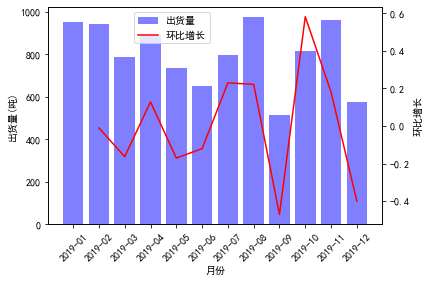

In [231]:
import matplotlib.pyplot as plt
import numpy as np
 
plt.rcParams['font.sans-serif']=['SimHei']#用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号
 
if __name__ == '__main__':
    X=["2019-01", "2019-02", "2019-03", "2019-04", "2019-05", "2019-06", "2019-07", "2019-08", "2019-09", "2019-10", "2019-11", "2019-12"]
    Y1=np.random.randint(500,1000,12)
    Y2=[None]
    for i in range(1,len(Y1)):
        Y2.append((Y1[i]-Y1[i-1])/Y1[i-1])
 
    fig, ax1 = plt.subplots()
    plt.xticks(rotation=45)
 
    ax1.bar(X, Y1, color="blue", alpha=0.5, label="出货量")
    ax1.set_xlabel("月份")
    ax1.set_ylabel("出货量(吨)")
 
    ax2 = ax1.twinx()
    ax2.plot(X, Y2, color="red", label="环比增长")
    ax2.set_ylabel("环比增长")
 
    fig.legend(loc="upper right", bbox_to_anchor=(0.5, 1), bbox_transform=ax1.transAxes)
    plt.show()

官方案例：https://matplotlib.org/stable/gallery/axisartist/demo_parasite_axes2.html#sphx-glr-gallery-axisartist-demo-parasite-axes2-py

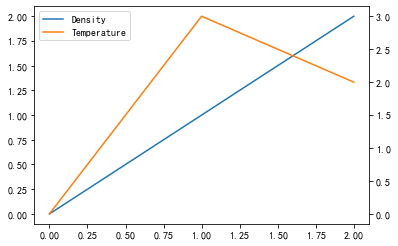

In [232]:
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist
import matplotlib.pyplot as plt

host = host_subplot(111)

par1 = host.twinx()

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")

host.legend()

plt.show()

Matplotlib 的默认颜色 以及 使用调色盘调整颜色

https://www.cnblogs.com/Gelthin2017/p/14177100.html  
https://matplotlib.org/3.1.1/users/dflt_style_changes.html

#### 实现代码

图像的内容尽量清晰简洁、不要有歧义

In [233]:
revenue_value = stock_df['营业收入'][1:]
revenue_rate = stock_df['营业收入'].pct_change(1)[1:]

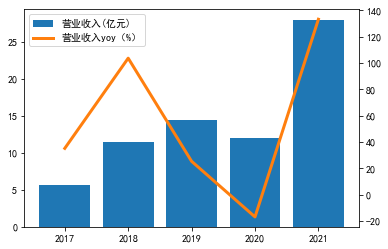

In [235]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

x = revenue_value.index.str.slice(0, 4)
y1 = revenue_value.values / 1e8
y2 = revenue_rate.values * 100

host = host_subplot(111)
par1 = host.twinx()
host.bar(x,y1,color='C0', label='营业收入(亿元)')
par1.plot(x,y2, color='C1', label='营业收入yoy（%）', linewidth=3)
host.legend(loc="upper left")

In [236]:
net_income_value = stock_df['净利润'][1:]
net_income_rate = stock_df['净利润'].pct_change(1)[1:]

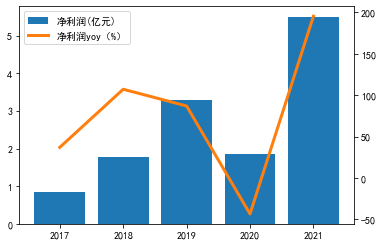

In [237]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

x = net_income_value.index.str.slice(0, 4)
y1 = net_income_value.values / 1e8
y2 = net_income_rate.values * 100

host = host_subplot(111)
par1 = host.twinx()
host.bar(x,y1,color='C0', label='净利润(亿元)')
par1.plot(x,y2, color='C1', label='净利润yoy（%）', linewidth=3)
host.legend()

### 降本提效

In [242]:
# 尽管不用算增速可以多1条数据，但是也要和其他数据对齐
net_rate = stock_df['利润率'][1:]
gross_rate = stock_df['毛利率'][1:]
sale_rate = stock_df['销售费用率'][1:]
admin_rate = stock_df['管理费用率'][1:]
finance_rate = stock_df['财务费用率'][1:]

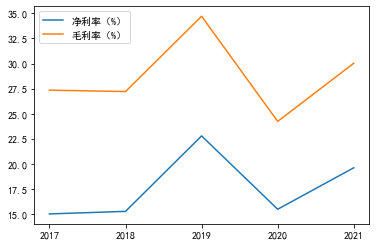

In [245]:
import matplotlib.pyplot as plt
x = revenue_value.index.str.slice(0, 4)
y0 = net_rate.values * 100
y1 = gross_rate.values * 100
fig = plt.figure()
plt.plot(x, y0, label='净利率（%）')
plt.plot(x, y1, label='毛利率（%）')
plt.legend(loc="upper left")

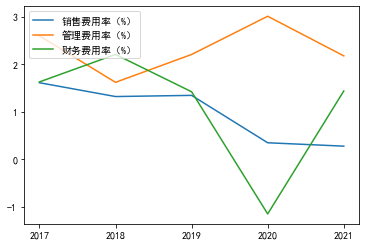

In [247]:
import matplotlib.pyplot as plt
x = sale_rate.index.str.slice(0, 4)
y2 = sale_rate.values * 100
y3 = admin_rate.values * 100
y4 = finance_rate.values * 100
fig = plt.figure()
plt.plot(x, y2, label='销售费用率（%）')
plt.plot(x, y3, label='管理费用率（%）')
plt.plot(x, y4, label='财务费用率（%）')
plt.legend(loc="upper left")

### 杜邦分析

方向不同的不要放在一个图，比如上面的利润一起费用一起，这里是ROE和周转率一起，然后负债率单独

In [248]:
# 尽管不用算增速可以多1条数据，但是也要和其他数据对齐
roe = stock_df['净资产收益率'][1:]
asset_turnover_rate = stock_df['资产周转率'][1:]
net_rate = stock_df['利润率'][1:]
debt_asset_rate = stock_df['资产负债率'][1:]

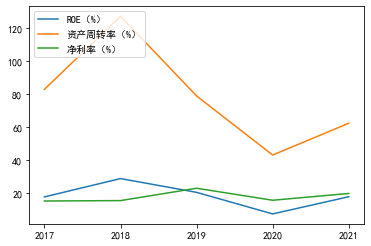

In [250]:
import matplotlib.pyplot as plt
x = revenue_value.index.str.slice(0, 4)
y0 = roe.values * 100
y1 = asset_turnover_rate.values * 100
y2 = net_rate.values * 100
fig = plt.figure()
plt.plot(x, y0, label='ROE（%）')
plt.plot(x, y1, label='资产周转率（%）')
plt.plot(x, y2, label='净利率（%）')
plt.legend(loc="upper left")

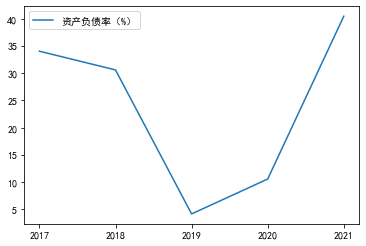

In [251]:
import matplotlib.pyplot as plt
x = revenue_value.index.str.slice(0, 4)
y2 = debt_asset_rate.values * 100
fig = plt.figure()
plt.plot(x, y2, label='资产负债率（%）')
plt.legend(loc="upper left")

### 图表保存

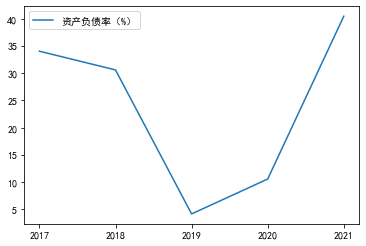

In [255]:
import matplotlib.pyplot as plt
x = revenue_value.index.str.slice(0, 4)
y2 = debt_asset_rate.values * 100
fig = plt.figure()
plt.plot(x, y2, label='资产负债率（%）')
plt.legend(loc="upper left")
plt.savefig('测试图片保存.jpg')

### 函数封装

In [270]:
def save_revenue_pic(stock_df, pic_name):
    # 导包
    import matplotlib.pyplot as plt
    from mpl_toolkits.axes_grid1 import host_subplot
    # 计算
    revenue_value = stock_df['营业收入'][1:]
    revenue_rate = stock_df['营业收入'].pct_change(1)[1:]
    x = revenue_value.index.str.slice(0, 4)
    y1 = revenue_value.values / 1e8
    y2 = revenue_rate.values * 100
    # 画图
    host = host_subplot(111)
    par1 = host.twinx()
    host.bar(x,y1,color='C0', label='营业收入(亿元)')
    par1.plot(x,y2, color='C1', label='营业收入yoy（%）', linewidth=3)
    host.legend(loc="upper left")
    plt.savefig(pic_name)
    # 清空画布
    plt.show()

In [271]:
def save_net_income_pic(stock_df, pic_name):
    # 导包
    import matplotlib.pyplot as plt
    from mpl_toolkits.axes_grid1 import host_subplot
    # 计算
    net_income_value = stock_df['净利润'][1:]
    net_income_rate = stock_df['净利润'].pct_change(1)[1:]
    x = net_income_value.index.str.slice(0, 4)
    y1 = net_income_value.values / 1e8
    y2 = net_income_rate.values * 100
    # 画图
    host = host_subplot(111)
    par1 = host.twinx()
    host.bar(x,y1,color='C0', label='净利润(亿元)')
    par1.plot(x,y2, color='C1', label='净利润yoy（%）', linewidth=3)
    host.legend(loc="upper left")
    plt.savefig(pic_name)
    # 清空画布
    plt.show()

In [272]:
def save_profit_rate_pic(stock_df, pic_name):
    # 导包
    import matplotlib.pyplot as plt
    # 计算
    net_rate = stock_df['利润率'][1:]
    gross_rate = stock_df['毛利率'][1:]
    # 画图
    x = net_rate.index.str.slice(0, 4)
    y0 = net_rate.values * 100
    y1 = gross_rate.values * 100
    fig = plt.figure()
    plt.plot(x, y0, label='利润率（%）')
    plt.plot(x, y1, label='毛利率（%）')
    plt.legend(loc="upper left")
    plt.savefig(pic_name)
    # 清空画布
    plt.show()

In [273]:
def save_cost_rate_pic(stock_df, pic_name):
    # 导包
    import matplotlib.pyplot as plt
    # 计算
    sale_rate = stock_df['销售费用率'][1:]
    admin_rate = stock_df['管理费用率'][1:]
    finance_rate = stock_df['财务费用率'][1:]
    # 画图
    x = sale_rate.index.str.slice(0, 4)
    y2 = sale_rate.values * 100
    y3 = admin_rate.values * 100
    y4 = finance_rate.values * 100
    fig = plt.figure()
    plt.plot(x, y2, label='销售费用率（%）')
    plt.plot(x, y3, label='管理费用率（%）')
    plt.plot(x, y4, label='财务费用率（%）')
    plt.legend(loc="upper left")
    plt.savefig(pic_name)
    # 清空画布
    plt.show()

In [274]:
def save_dupont1_pic(stock_df, pic_name):
    # 导包
    import matplotlib.pyplot as plt
    # 计算
    roe = stock_df['净资产收益率'][1:]
    asset_turnover_rate = stock_df['资产周转率'][1:]
    net_rate = stock_df['利润率'][1:]
    debt_asset_rate = stock_df['资产负债率'][1:]
    # 画图
    x = roe.index.str.slice(0, 4)
    y0 = roe.values * 100
    y1 = asset_turnover_rate.values * 100
    y2 = net_rate.values * 100
    fig = plt.figure()
    plt.plot(x, y0, label='ROE（%）')
    plt.plot(x, y1, label='资产周转率（%）')
    plt.plot(x, y2, label='利润率（%）')
    plt.legend(loc="upper left")
    plt.savefig(pic_name)
    # 清空画布
    plt.show()

In [275]:
def save_dupont2_pic(stock_df, pic_name):
    # 导包
    import matplotlib.pyplot as plt
    # 计算
    roe = stock_df['净资产收益率'][1:]
    asset_turnover_rate = stock_df['资产周转率'][1:]
    net_rate = stock_df['利润率'][1:]
    debt_asset_rate = stock_df['资产负债率'][1:]
    # 画图
    x = roe.index.str.slice(0, 4)
    y2 = debt_asset_rate.values * 100
    fig = plt.figure()
    plt.plot(x, y2, label='资产负债率（%）')
    plt.legend(loc="upper left")
    plt.savefig(pic_name)
    # 清空画布
    plt.show()

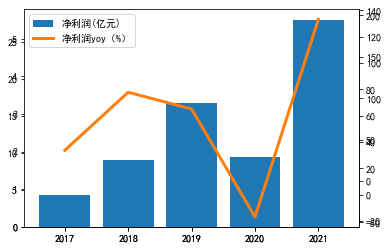

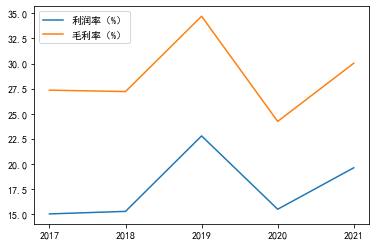

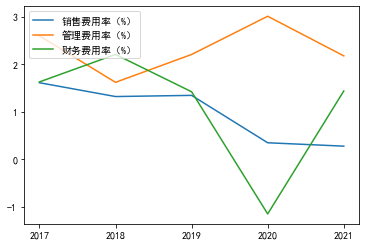

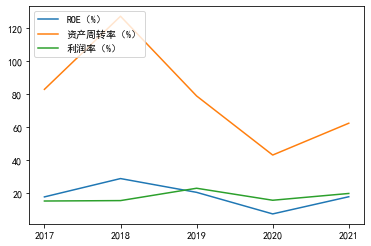

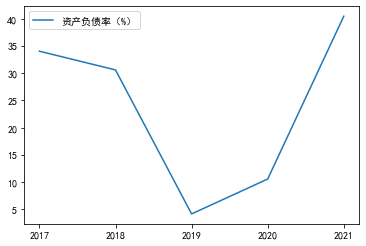

In [262]:
save_revenue_pic(stock_df, '图表保存测试/1.jpg')
save_net_income_pic(stock_df, '图表保存测试/2.jpg')
save_profit_rate_pic(stock_df, '图表保存测试/3.jpg')
save_cost_rate_pic(stock_df, '图表保存测试/4.jpg')
save_dupont1_pic(stock_df, '图表保存测试/5.jpg')
save_dupont2_pic(stock_df, '图表保存测试/6.jpg')

## 文字图表合并

### 先保存好图片

In [276]:
import os
root_path = '年报图表'

In [277]:
stock_doc_path = f'{stock_name}-{stock_id}-{report_year}'
pic_path = os.path.join(root_path, stock_doc_path)

In [279]:
if not os.path.exists(pic_path):
    os.makedirs(pic_path)

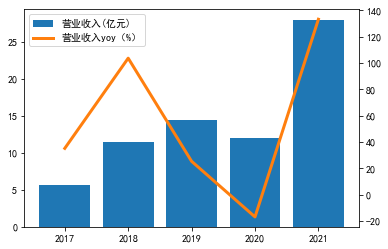

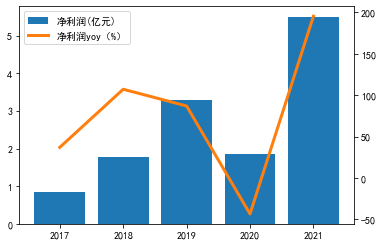

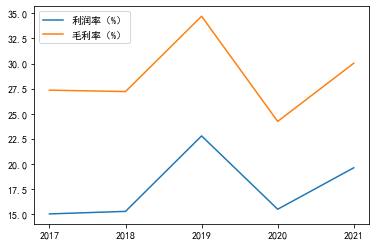

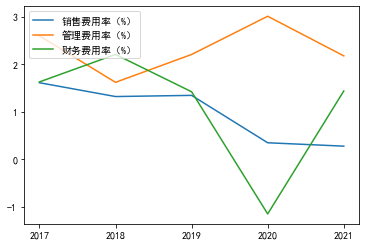

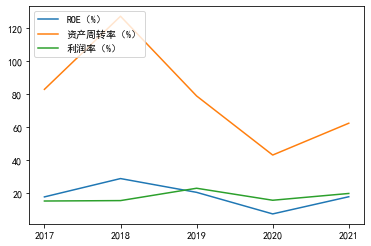

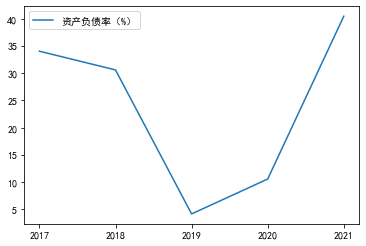

In [280]:
save_revenue_pic(stock_df, os.path.join(pic_path, '1.jpg'))
save_net_income_pic(stock_df, os.path.join(pic_path, '2.jpg'))
save_profit_rate_pic(stock_df, os.path.join(pic_path, '3.jpg'))
save_cost_rate_pic(stock_df, os.path.join(pic_path, '4.jpg'))
save_dupont1_pic(stock_df, os.path.join(pic_path, '5.jpg'))
save_dupont2_pic(stock_df, os.path.join(pic_path, '6.jpg'))

问题：同时添加2个图片到1行怎么办？
https://stackoverflow.com/questions/57361943/add-two-images-in-same-line-in-python-docx

自己用word尝试了下，发现7.5cm宽度正合适，厘米英寸转换麻烦，自然想到导包中有厘米单位，from docx.shared import Cm

### 再导出结果

In [282]:
from docx import Document
from docx.shared import Cm
from docx.oxml.ns import qn
from docx.shared import Pt 

document = Document()

# 修改字体
document.styles['Normal'].font.name = 'Times New Roman'
document.styles['Normal']._element.rPr.rFonts.set(qn('w:eastAsia'), u'微软雅黑')

# 标题部分
heading = document.add_heading(f'{stock_name}({stock_id}){report_year}年报分析', 0)
change_font(heading)

# 第一段文字
heading1 = document.add_heading('营收利润情况', level=1)
change_font(heading1)
p1_text = stock_revenue_status(stock_name, stock_id, stock_df)
document.add_paragraph(p1_text)
# 第一组图片
para_pic1 = document.add_paragraph()
para_pic1.add_run().add_picture(os.path.join(pic_path, '1.jpg'), width=Cm(7.5))
para_pic1.add_run().add_picture(os.path.join(pic_path, '2.jpg'), width=Cm(7.5))

# 第二段文字
heading2 = document.add_heading('运营效率情况', level=1)
change_font(heading2)
p2_text = stock_efficiency_status(stock_name, stock_id, stock_df)
document.add_paragraph(p2_text)
# 第二组图片
para_pic1 = document.add_paragraph()
para_pic1.add_run().add_picture(os.path.join(pic_path, '3.jpg'), width=Cm(7.5))
para_pic1.add_run().add_picture(os.path.join(pic_path, '4.jpg'), width=Cm(7.5))

# 第三段文字
heading3 = document.add_heading('杜邦分析', level=1)
change_font(heading3)
p3_text = stock_finance_status(stock_name, stock_id, stock_df)
document.add_paragraph(p3_text)
# 第三组图片
para_pic1 = document.add_paragraph()
para_pic1.add_run().add_picture(os.path.join(pic_path, '5.jpg'), width=Cm(7.5))
para_pic1.add_run().add_picture(os.path.join(pic_path, '6.jpg'), width=Cm(7.5))

# 第四段文字
p4_text = stock_industry_status(stock_name, stock_id, industry_df, rank_index_list, index_direction_list, tmp_rank)
if p4_text:  # 字符串不为''就是True
    heading4 = document.add_heading('行业情况', level=1)
    change_font(heading4)
    document.add_paragraph(p4_text)

# 翻页获取表格
# document.add_page_break()
finance_table = get_finance_table(stock_df)
dupont_table = get_dupont_table(stock_df)
document = add_df_document(finance_table, document, '财务摘要（百万元）')
document.add_paragraph('\n')
document = add_df_document(dupont_table, document, '杜邦分析指标')

# 保存
document.save(stock_doc_path+ '年报分析.docx')

# 最终函数封装

## 测试函数参数

【国君化妆品】上海家化2021年报点评：护肤品类驱动增长，毛利提升优化盈利：https://mp.weixin.qq.com/s/cmcj2vIZ9iI8dvwl855pyQ  
【国君食品|年报点评】海天味业：短期承压，长期乐观：  
https://mp.weixin.qq.com/s/xHlJyIoyDaNgY_zZF1THcw

上海家化[600315]  海天味业[603288]

## 重启内核重试

这样才能真正的清除缓存的干扰，从0到1测试好结果

In [286]:
import pandas as pd
total_df = pd.read_csv('2023-01-08 加工导出.csv', index_col=['公告日期', '股票代码'])

- 漏复制代码：中文乱码代码，industry_df，tmp_rank
- 函数内变量错误：sale_rate_flag/sale_rate未替换，表格转文字的pd没导入

In [283]:
from afan_docx import output_report

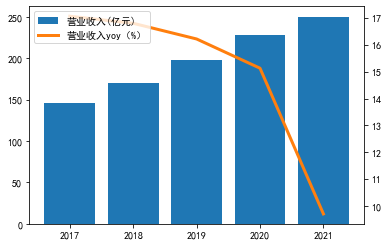

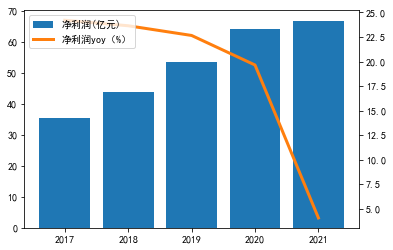

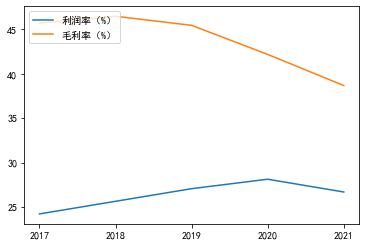

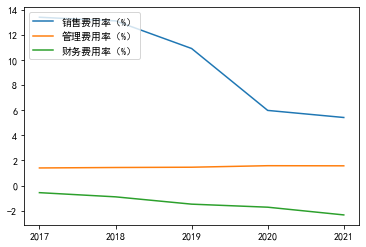

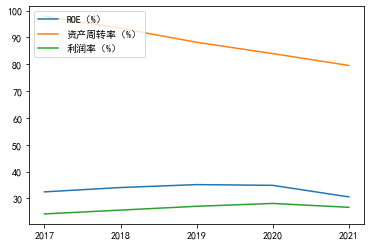

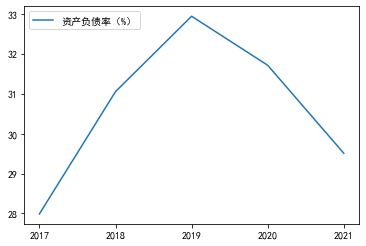

In [288]:
output_report('603288.SH', '2021', total_df)

# 后续计划

- 1 报告文字更加精细，如接近下输出“持平”、金额单位根据实际情况输出“万”、“亿”
- 2 报告分析语句更加丰富，考虑近几年的趋势和历史高点，以及子项贡献
- 3 标题太平淡了，但这个得借助NLP了
- 4 部分指标如EBIT还是没算对

强调：
- 1 AFAN写的时候也在不断调试格式，所以大家感觉自己写的不好不要灰心，我这花了很长时间
- 2 想做好一个自动化报告系统其实很复杂
- 3 指标的确认也很重要，不然是无用功